https://www.researchgate.net/publication/325967542_Heart_Rate_Analysis_for_Human_Factors_Development_and_Validation_of_an_Open_Source_Toolkit_for_Noisy_Naturalistic_Heart_Rate_Data

https://python-heart-rate-analysis-toolkit.readthedocs.io<BR>
https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/quickstart.html#getting-data-from-files

https://github.com/paulvangentcom/heartrate_analysis_python

https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/1_regular_PPG/Analysing_a_PPG_signal.ipynb



In [1]:
!pip install heartpy

    100% |████████████████████████████████| 1.0MB 1.5MB/s 


In [50]:
import heartpy as hp

In [51]:
import pandas
print('pandas',pandas.__version__)

pandas 0.23.4


In [52]:
df = pandas.read_csv('cms50dplus_recordings/20191012_2155.csv')

In [53]:
df.head()

,Time,PulseRate,SpO2,PulseWaveform,BarGraph,SignalStrength,Beep,FingerOut,Searching,DroppingSpO2,ProbeError
0,2019-10-13 01:46:33.656321,0,0,0,1,4,False,False,True,False,False
1,2019-10-13 01:46:33.673044,0,0,20,2,4,False,False,False,False,False
2,2019-10-13 01:46:33.689722,0,0,0,0,4,False,False,False,False,False
3,2019-10-13 01:46:33.706442,0,0,0,0,4,False,False,False,False,False
4,2019-10-13 01:46:33.723051,0,0,0,0,4,False,False,False,False,False


In [54]:
df[['Time','PulseWaveform']].to_csv('tmp.csv',index=False)

In [58]:
!head tmp.csv

Time,PulseWaveform
2019-10-13 01:46:33.656321,0
2019-10-13 01:46:33.673044,20
2019-10-13 01:46:33.689722,0
2019-10-13 01:46:33.706442,0
2019-10-13 01:46:33.723051,0
2019-10-13 01:46:33.739699,0
2019-10-13 01:46:33.756451,0
2019-10-13 01:46:33.773130,0
2019-10-13 01:46:33.789971,0


In [55]:
import numpy
print(numpy.__version__)

1.13.3


In [56]:
#hrdata = hp.get_data('cms50dplus_recordings/20191012_2155.csv',column_name='PulseWaveform')
hrdata = hp.get_data('tmp.csv')

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

In [59]:
type(hrdata)

numpy.ndarray

In [60]:
hrdata.shape

(18628, 2)

In [63]:
hrdata[100:105]

array([[ nan,  21.],
       [ nan,  21.],
       [ nan,  21.],
       [ nan,  23.],
       [ nan,  27.]])

In [57]:
fs = hp.get_samplerate_datetime(hrdata, timeformat='%Y-%m-%d %H:%M:%S.%f')

TypeError: strptime() argument 1 must be str, not numpy.ndarray

In [43]:
fs=100

In [29]:
working_data, measures = hp.process(hrdata, fs, report_time=True)



Finished in 0.099056 sec


In [30]:
print(measures['bpm']) #returns BPM value
print(measures['rmssd']) # returns RMSSD HRV measure


119.050236342
26.5309044114


In [92]:
df = pandas.read_csv("tmp.csv")
df.shape

(18627, 2)

In [67]:
df.head()

,Time,PulseWaveform
0,2019-10-13 01:46:33.656321,0
1,2019-10-13 01:46:33.673044,20
2,2019-10-13 01:46:33.689722,0
3,2019-10-13 01:46:33.706442,0
4,2019-10-13 01:46:33.723051,0


In [68]:
#note we need calc_freq if we want frequency-domain measures
working_data, measures = hp.process(df['PulseWaveform'].values, fs, calc_freq=True)


bpm: 119.050236342
lf/hf: 0.534443584279


In [71]:
type(working_data)

dict

In [72]:
working_data.keys()

dict_keys(['hr', 'peaklist', 'ybeat', 'rolling_mean', 'RR_list', 'RR_diff', 'RR_sqdiff', 'rrsd', 'best', 'peaklist_cor', 'removed_beats', 'removed_beats_y', 'binary_peaklist', 'RR_masklist', 'RR_list_cor', 'nn20', 'nn50', 'frq', 'psd', 'interp_rr_function', 'interp_rr_linspace'])

In [73]:
measures.keys()

dict_keys(['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'breathingrate', 'lf', 'hf', 'lf/hf'])

In [ ]:
print('bpm:',measures['bpm'])
print('lf/hf:',measures['lf/hf'])

In [75]:
for k,v in measures.items():
    print(k,v)

bpm 119.050236342
ibi 503.988919668
sdnn 30.7638649992
sdsd 20.6871911226
rmssd 26.5309044114
pnn20 0.175
pnn50 0.044444444444444446
hr_mad 10.0
breathingrate 0.38653567402158157
lf 15070.2688831
hf 28198.0536888
lf/hf 0.534443584279


In [76]:
working_data['hr']

array([ 0, 20,  0, ...,  0,  0,  0])

In [78]:
working_data['peaklist'][0:10]

[74, 109, 157, 202, 253, 303, 355, 406, 457, 505]

In [81]:
working_data['hr'][65:85]

array([28, 29, 31, 34, 38, 41, 46, 51, 55, 57, 57, 56, 53, 50, 47, 44, 41,
       40, 38, 35])

In [82]:
working_data['hr'][100:120]

array([21, 21, 23, 27, 32, 38, 43, 49, 53, 54, 52, 48, 42, 36, 28, 21, 14,
        7,  3,  0])

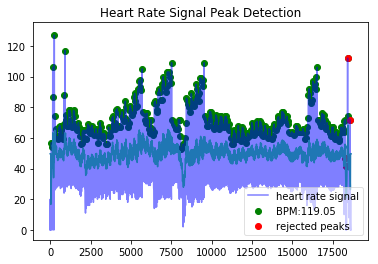

In [83]:
hp.plotter(working_data, measures)

In [86]:
working_data, measures = hp.process_segmentwise(df['PulseWaveform'].values, 
                                                sample_rate=100.0,
                                                segment_width = 40, segment_overlap = 0.25)

In [88]:
type(working_data)

dict

In [91]:
working_data['hr']

[array([ 0, 20,  0, ..., 40, 39, 39]),
 array([35, 35, 37, ..., 53, 67, 80]),
 array([54, 62, 70, ..., 44, 44, 44]),
 array([43, 43, 43, ..., 64, 60, 57]),
 array([30, 29, 29, ..., 77, 71, 64]),
 array([26, 29, 33, ...,  0,  0,  0])]

In [93]:
len(working_data['hr'][0])

4000